In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import functions as fn
import Box
import Halo
import myRCParams

In [2]:
z = 2
x_bins = np.logspace(-2, 0, 21)
m_bins = np.logspace(10.5, 13.2, 11)
k = np.logspace(-1, 2, 30)

In [3]:
x = np.sqrt(x_bins[:-1]*x_bins[1:])
m = np.sqrt(m_bins[:-1]*m_bins[1:])
log_m = np.log10(m)
log_m_bins = np.log10(m_bins)

In [4]:
box = Box.Box(fn.box_path, fn.shot[z])

In [14]:
df = pd.read_csv(fn.here_path/'Density_Profiles'/f'box_z{z}.csv')
halo_mass = np.array(df.iloc[:,1])

print(f'Read in {halo_mass.shape[0]} haloes.')

halo_density = np.array(df.iloc[:, 2:-1]) * 1e9
halo_r200c = np.array(df.iloc[:, -1]) * 1e-3
pos = np.array([0, 0, 0])
halos = [Halo.Halo(pos, r200c) for r200c in halo_r200c]
for i, halo in enumerate(halos):
    halo.mass = halo_mass[i]
    halo.density = halo_density[i,:]

Read in 6218 haloes.


In [15]:
avg_halos, no_halos = fn.get_mass_avg_density(halos, x_bins, m_bins)
for i, n in enumerate(no_halos):
    print(f'{n} in 10^{round(log_m_bins[i],2)} - 10^{round(log_m_bins[i+1],2)}')

2619.0 in 10^10.5 - 10^10.77
1452.0 in 10^10.77 - 10^11.04
710.0 in 10^11.04 - 10^11.31
402.0 in 10^11.31 - 10^11.58
192.0 in 10^11.58 - 10^11.85
90.0 in 10^11.85 - 10^12.12
35.0 in 10^12.12 - 10^12.39
17.0 in 10^12.39 - 10^12.66
8.0 in 10^12.66 - 10^12.93
3.0 in 10^12.93 - 10^13.2


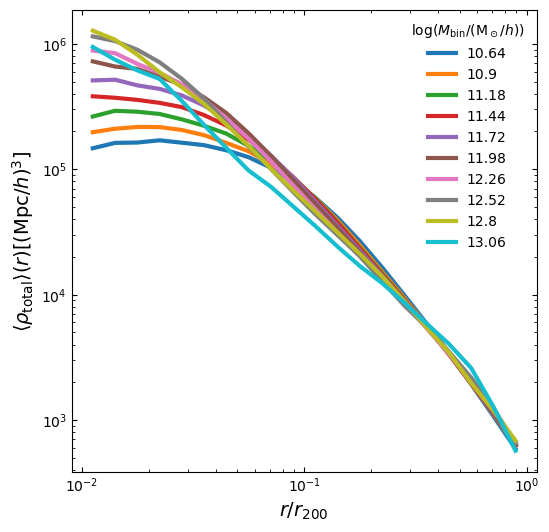

In [16]:
fg, ax = plt.subplots()
ax.loglog()
ax.set_xlabel(r'$r/r_{200}$')
ax.set_ylabel(r'$\langle\rho_\mathrm{total}\rangle(r)[(\mathrm{Mpc}/h)^3]$')
for i, halo in enumerate(avg_halos):
    ax.plot(x, halo.density, linewidth=3, label=round(log_m[i],2))
ax.legend(title='$\log(M_\mathrm{bin}/(\mathrm{M}_\odot/h))$')

In [17]:
[halo.get_u(x, k) for halo in avg_halos]

[None, None, None, None, None, None, None, None, None, None]

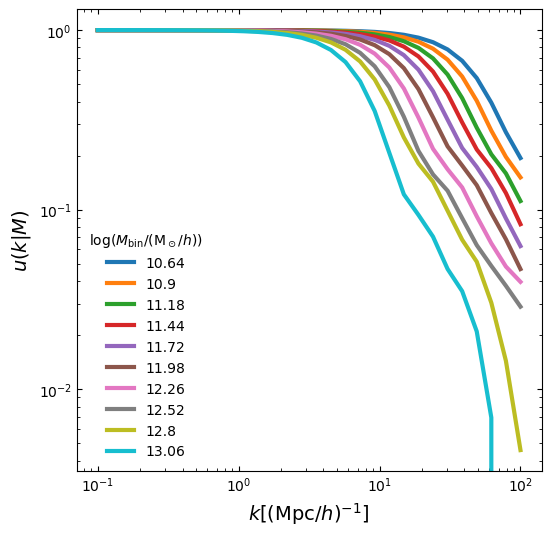

In [18]:
fg2, ax2 = plt.subplots()
ax2.loglog()
ax2.set_xlabel(r'$k[(\mathrm{Mpc}/h)^{-1}]$')
ax2.set_ylabel(r'$u(k|M)$')
for i, halo in enumerate(avg_halos):
    ax2.plot(k, halo.u, linewidth=3, label=round(log_m[i],2))
ax2.legend(title='$\log(M_\mathrm{bin}/(\mathrm{M}_\odot/h))$')

In [19]:
P_1h = fn.get_power(box, avg_halos, k, m_bins, z, no_halos)

10


/data/ERCblackholes4/eac83/FABLE_S8/functions.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  hist = np.array(np.histogram(mass, bins=m))


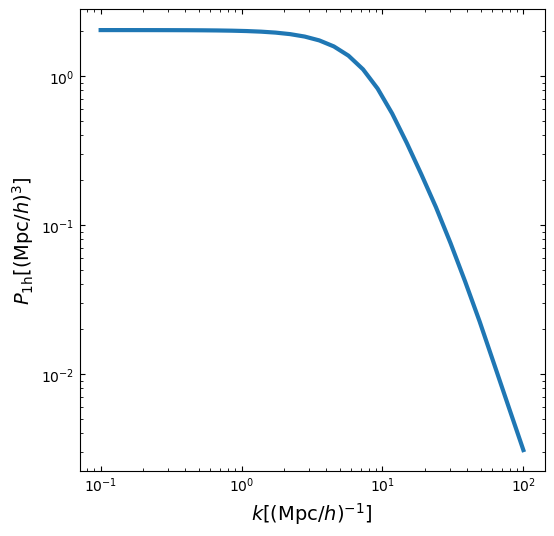

In [20]:
fg3, ax3 = plt.subplots()
ax3.loglog()
ax3.set_xlabel(r'$k[(\mathrm{Mpc}/h)^{-1}]$')
ax3.set_ylabel(r'$P_\mathrm{1h}[(\mathrm{Mpc}/h)^3]$')
ax3.plot(k, P_1h, linewidth=3)

In [21]:
with open(fn.here_path/'Power_Spectra'/f'box_z{z}.csv', 'w') as f:
    header = 'k, P_1h \n'
    f.write(header)
    np.savetxt(f, np.c_[k, P_1h], delimiter=',')